In [4]:
import numba 
import numpy as np

In [5]:
%run ./Genera_LIB_V5.ipynb
%run ./Genetic_Lib.ipynb

In [6]:
%run ./functions_gandalf_wintermute.py

5.13.1


In [7]:
import numba 

def carica_storico(file_name,uct_offset,type_session,resample_tf,IS,OOS,custom_session_start,custom_session_stop):
    import os
    import talib as ta
    
    os.chdir(dir_history)
    data = load_data_intraday_fast(file_name)  
    print("Caricato storico")
    data = data.sort_index(ascending=True)
    data.index = data.index.tz_localize('Etc/Zulu')
    data.index = data.index.tz_convert(uct_offset )
    data.index = data.index.tz_localize(None)
    data = data[data!=0]
    #data = data.fillna(method="ffill")
    data = data.iloc[1:-1]
    print("Resample dei dati")
    if type_session == 1:
        dataset=resample_custom_session("5min",resample_tf ,data,custom_session_start,custom_session_stop) 
    if type_session == 0:    
        dataset=resample_standard_session("5min",resample_tf,data)
        
    dataset = dataset.loc[IS:OOS]

    print("Fatto")
    return dataset 

def environment_fast(simbolo,type_session,resample_tf,start_date,end_date):
               
    file_name = check_history_name(simbolo,dir_history)

    IS = start_date
    OOS = end_date

    bigpointvalue=valori[valori.Physical==simbolo].BigPointValue.values[0]
    tick=valori[valori.Physical==simbolo].Tick.values[0]
    utc_offset = valori[valori.Physical==simbolo].Exchange_Time.values[0]
    custom_session_start = "0"+str(valori[valori.Physical==simbolo]["Custom Open"].values[0])
    custom_session_stop = str(valori[valori.Physical==simbolo]["Custom Close"].values[0])
    costi=valori[valori.Physical==simbolo].Cost.values[0]

    dataset = carica_storico(file_name,utc_offset,type_session,resample_tf,IS,OOS,custom_session_start,custom_session_stop)
    
    return dataset , bigpointvalue , tick , utc_offset , custom_session_start , custom_session_stop , costi 

import os 
import numpy as np
import pandas as pd

dir_home=(r"C:\Users\Drako\Genetico_V3")
dir_history=(r"C:\Users\Drako\TS_API")

def info_simboli():
    import os
    import numpy as np
    import pandas as pd

    valori=pd.read_csv("Markets_Specifications_Live.csv",sep=",",encoding='cp1252')
    valori.reset_index(inplace=True)
    valori.Exchange_Time=np.where(valori.Exchange_Time==-6,"CST6CDT",valori.Exchange_Time)
    valori.Exchange_Time=np.where(valori.Exchange_Time=="-5","EST5EDT",valori.Exchange_Time)
    valori.Exchange_Time=np.where(valori.Exchange_Time=="1","CET",valori.Exchange_Time)
    valori["Simbolo"]=valori.Physical
    valori=valori[(valori.Physical!="KC")&(valori.Physical!="TY")]
    return valori


os.chdir(dir_home)
valori=info_simboli()

valori

,index,SecurityName,Exchange Code,Physical,Underlying Future,MarketTypeName,Exchange,BigPointValue,Unit,Margins,Regular Open,Regular Close,Custom Open,Custom Close,Tick,Cost,AMP_simb,Exchange_Time,TT_Code,Simbolo
0,0,Australian Dollar,6A,AD,Australian Dollar,Currencies,CME,100000,0.00,2000,1700,1600,720,1400,0.000100,25,DA6,CST6CDT,6A,AD
1,1,British Pound,6B,BP,British Pound,Currencies,CME,62500,0.00,2500,1700,1600,720,1400,0.000100,25,BP6,CST6CDT,6B,BP
2,2,Crude Oil,CL,CL,Crude Oil,Energies,CME,1000,0.10,6000,1800,1700,900,1430,0.010000,50,CLE,EST5EDT,CL,CL
3,3,Euro FX,6E,EC,Euro FX,Currencies,CME,125000,0.00,3000,1700,1600,720,1400,0.000100,25,EU6,CST6CDT,6E,EC
4,4,E-mini S&P 500,ES,ES,E-mini S&P 500,Stock Indices,CME,50,0.10,12000,1700,1600,830,1515,0.250000,25,EP,CST6CDT,ES,ES
5,5,DAX Futures,FDAX,FDAX,DAX Futures,Stock Indices,EUREX,25,0.20,30000,110,2200,800,2200,0.500000,50,FDX,CET,FDAX,FDAX
6,6,EURO STOXX 50 Index,FESX,FESX,EURO STOXX 50 Index,Stock Indices,EUREX,5,0.00,3000,110,2200,800,2200,0.500000,20,DSX,CET,FESX,FESX
7,7,Euro Bund,FGBL,FGBL,Euro Bund,Fixed Income,EUREX,1000,0.00,2400,110,2200,800,2200,0.010000,20,DB,CET,FGBL,FGBL
8,8,Gold,GC,GC,Gold,Metals,CME,100,0.10,8500,1800,1700,800,1500,0.100000,60,GCE,EST5EDT,GC,GC
9,9,Copper,HG,HG,Copper,Metals,CME,25000,0.00,7500,1800,1700,800,1500,0.050000,60,CPE,EST5EDT,HG,HG


In [8]:
import datetime

TYPE_SESSION = 0    
RESAMPLE_TF = "60min"  ### RESAMPLE POSSIBILI "5min","15min","30min","60min","120min","240min","480min","1380min","1440min"]
START_DATE = "2012-01-01"
END_DATE = "2023-05-01"


simbolo = "CL"


dataset , bigpointvalue , tick , utc_offset , custom_session_start , custom_session_stop , costi = environment_fast(simbolo,TYPE_SESSION,RESAMPLE_TF,START_DATE,END_DATE)


#dataset= dataset.resample("W").agg({'open': 'first','high': 'max','low':'min','close':'last','volume':'sum'})

#dataset.index = dataset.index.date
#dataset.index=pd.to_datetime(dataset.index)

dataset.tail(10)

Caricato storico
Resample dei dati
Fatto


,open,high,low,close,volume
date_time,,,,,
2022-07-11 09:00:00,102.03,102.35,100.89,101.22,16206.0
2022-07-11 10:00:00,101.23,103.66,101.04,102.87,37898.0
2022-07-11 11:00:00,102.85,103.15,101.80,102.29,24062.0
2022-07-11 12:00:00,102.28,104.07,102.13,103.71,22762.0
2022-07-11 13:00:00,103.71,104.17,103.26,103.87,12923.0
2022-07-11 14:00:00,103.86,104.57,103.64,103.87,13949.0
2022-07-11 15:00:00,103.88,104.36,103.32,103.70,16979.0
2022-07-11 16:00:00,103.71,103.94,103.42,103.47,4050.0
2022-07-11 17:00:00,103.48,103.67,103.29,103.46,1560.0


<AxesSubplot:xlabel='date_time'>

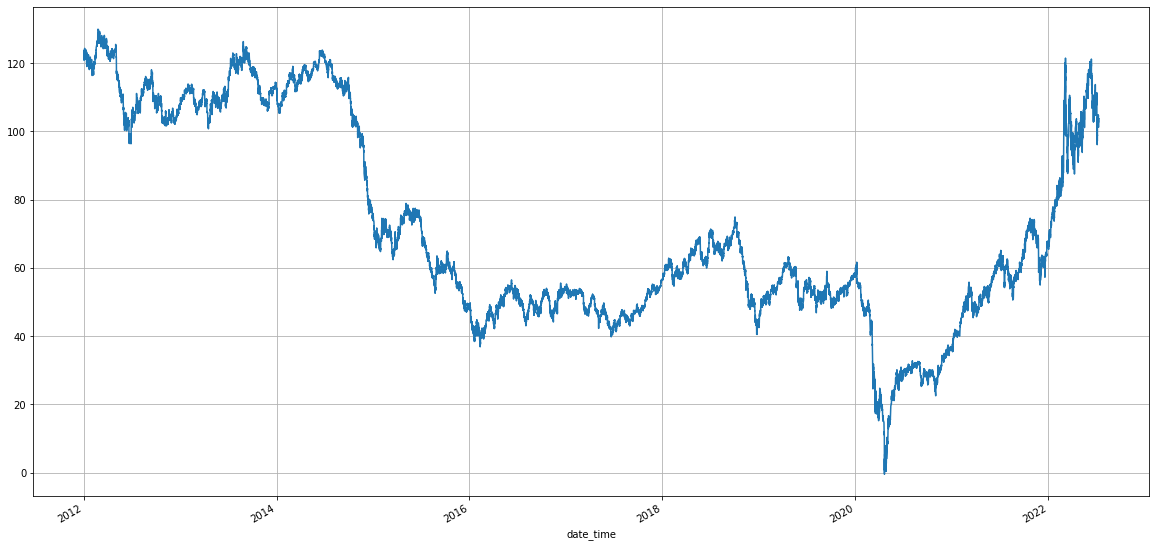

In [6]:
dataset.close.plot(figsize=(20,10),grid=True)

In [1]:
####################### pattern

dataset["dayofweek"] = dataset.index.dayofweek
dataset["day"] = dataset.index.day
dataset["week"] = dataset.index.week
dataset["month"] = dataset.index.month
dataset["year"] = dataset.index.year
dataset["dayofyear"] = dataset.index.dayofyear
dataset["quarter"] = dataset.index.quarter
dataset["hour"] = dataset.index.hour
dataset["minute"] = dataset.index.minute
dataset["daily_open"] = daily_open(dataset,1)
dataset["daily_high"] = daily_high(dataset,1)
dataset["daily_low"] = daily_low(dataset,1)
dataset["daily_close"] = daily_close(dataset,1)

def eval_pattern(ptn):
    for e in ptn:
        exec(e,data)

#def apply_indicator(dataset):

data=dataset.copy()

ptn=pattern_translator()
ptn_list = []
for e in tqdm(range(1,len(ptn))):
    for r in ptn["p"+str(e)]:
        exec(r)
    ptn_list.append("p"+str(e))
        
dataset["p96"] = True
        
data = dataset[ptn_list]  
#for i in data.columns:
#    data[i+"_not"] = ~data[i]
#    dataset[i+"_not"] = ~dataset[i]

NameError: name 'dataset' is not defined

In [9]:
pnl = ((dataset.open.shift(-1)-dataset.open)*bigpointvalue).to_frame("PNL")

pnl["H"] = pnl.index.hour
pnl["D"] = pnl.index.dayofweek

#pnl["M"] = pnl.index.month
#pnl["Y"] = pnl.index.year

#pnl["DY"] = pnl.index.day
#pnl["Q"] = pnl.index.quarter
#pnl["W"] = pnl.index.week
#pnl["DOY"] = pnl.index.dayofyear
#df = pnl.groupby(["H","D","M"]).sum().PNL.to_frame()#.plot.bar(figsize=(20,10))
#df

from sklearn.cluster import KMeans

X = pnl.iloc[:,1:].loc[:"2023-01-01"].copy()
profit_loss_df = pnl.copy()

n_clusters = 10

# Creazione e addestramento del modello K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

kmeans.predict(pnl.iloc[:,1:].copy())

# Aggiunta delle etichette dei cluster al dataframe originale
profit_loss_df['Cluster'] = kmeans.labels_

# Visualizzazione dei cluster ottenuti
plt.figure(figsize=(8, 6))
for cluster_id in range(n_clusters):
    cluster_data = profit_loss_df[profit_loss_df['Cluster'] == cluster_id]
    cluster_data.PNL.cumsum().plot()
    plt.legend()
    plt.grid(True)
    plt.show()
    #plt.scatter(cluster_data['H'], cluster_data['PNL'], label=f'Cluster {cluster_id}')
plt.xlabel('Ora (Numerica)')
plt.ylabel('Profitto/Perdita')


from hmmlearn.hmm import GaussianHMM

from sklearn.cluster import KMeans

test = pd.DataFrame()

# Supponiamo di avere già creato il dataframe 'X' contenente i dati di addestramento, e 'pnl' contenente i dati completi
X = pnl.iloc[:, 1:].loc[:"2020-01-01"].copy()
profit_loss_df = pnl.loc[:"2020-01-01"].copy()

n_components=10

hmm_model = GaussianHMM(n_components , 
                        covariance_type = "full", 
                        n_iter = 100,
                        random_state = 99).fit(X)
 

# Ora supponiamo di avere nuovi dati in un dataframe chiamato 'new_data'
# Esegui il clustering su nuovi dati
X = pnl.iloc[:, 1:].copy()
profit_loss_df = pnl.copy()
new_data_cluster_labels = hmm_model.predict(X)


profit_loss_df['Cluster'] = new_data_cluster_labels

# Visualizzazione dei cluster ottenuti
plt.figure(figsize=(8, 6))
for cluster_id in range(n_components):
    cluster_data = profit_loss_df[profit_loss_df['Cluster'] == cluster_id]
    if cluster_data.PNL.sum()>0:
        cluster_data.PNL.cumsum().plot(title="Cluster_Long_N:°"+str(cluster_id))
        test = pd.concat([test,cluster_data.PNL.to_frame("Cluster_"+str(cluster_id))])
    else:
        (cluster_data.PNL).cumsum().plot(title="Cluster_Short_N:°"+str(cluster_id))
        test = pd.concat([test,(-cluster_data.PNL).to_frame("Cluster_"+str(cluster_id))])
    plt.legend()
    plt.grid(True)
    plt.show()

In [23]:
X.tail()

,H,D,M,Y
date_time,,,,
2023-02-17 10:00:00,10,4,2,2023
2023-02-17 11:00:00,11,4,2,2023
2023-02-17 12:00:00,12,4,2,2023
2023-02-17 13:00:00,13,4,2,2023
2023-02-17 14:00:00,14,4,2,2023


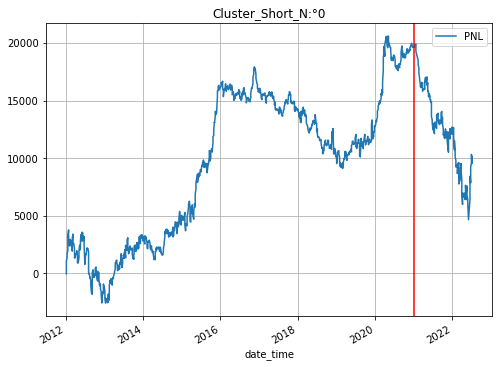

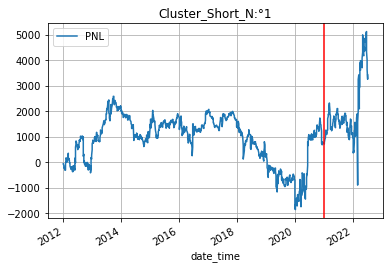

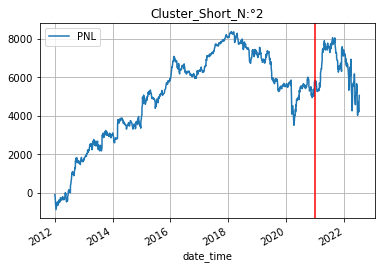

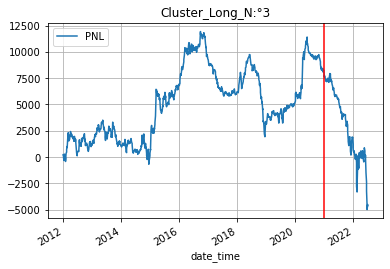

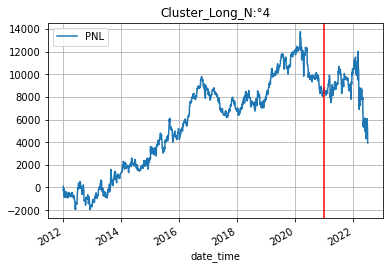

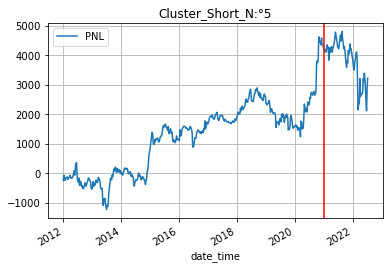

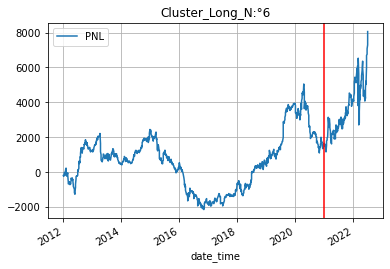

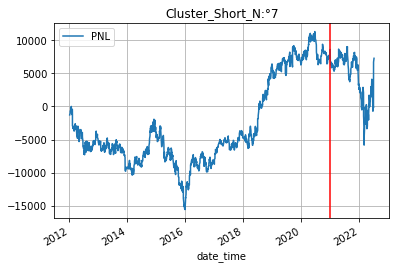

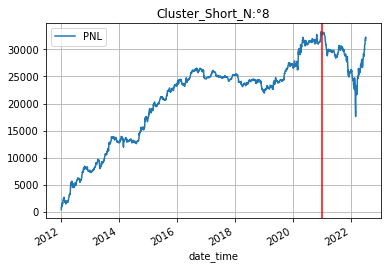

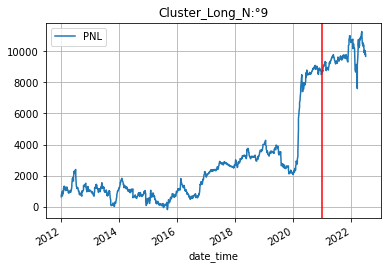

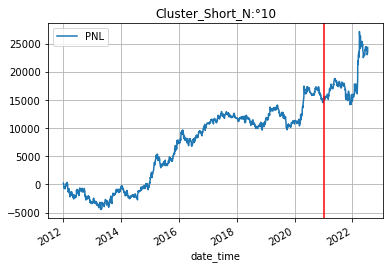

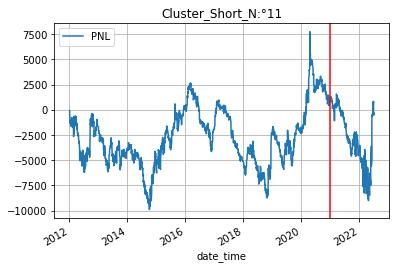

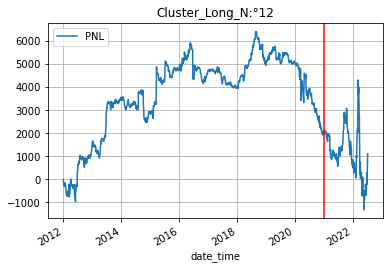

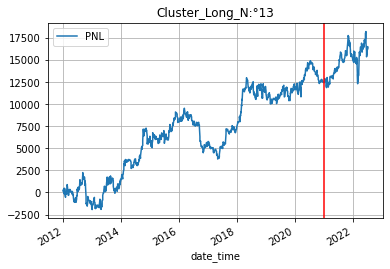

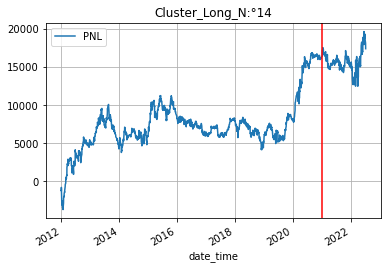

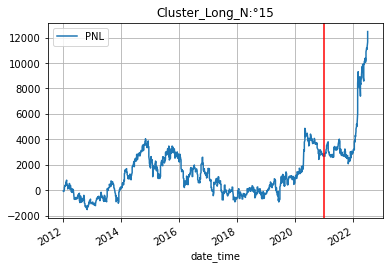

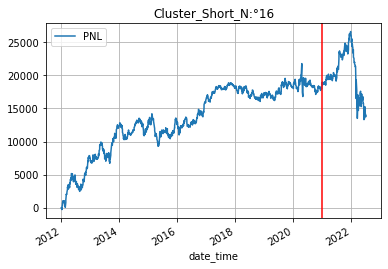

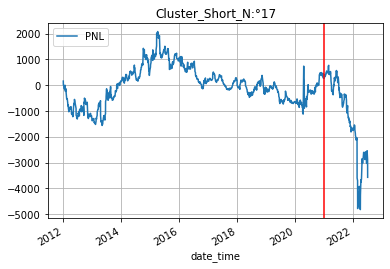

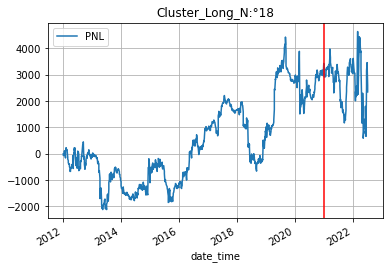

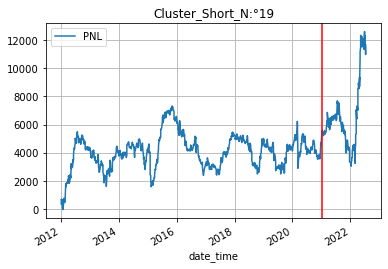

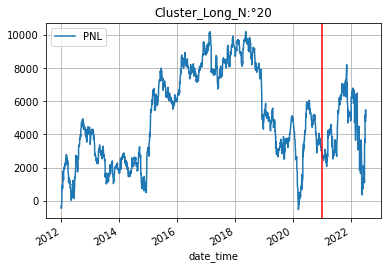

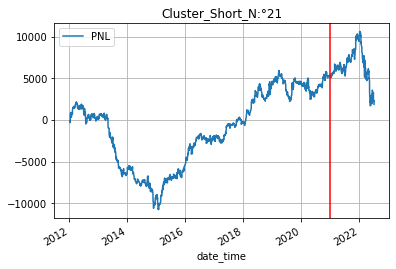

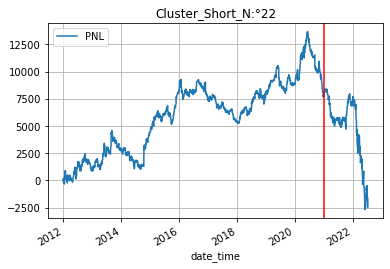

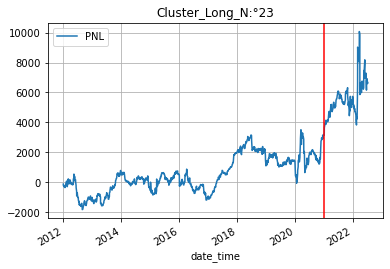

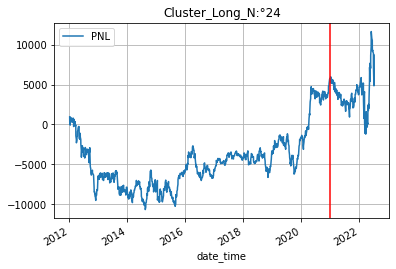

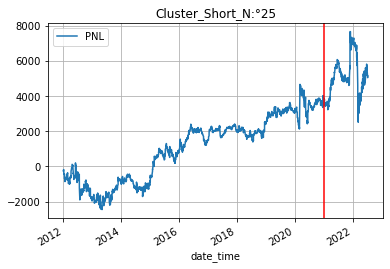

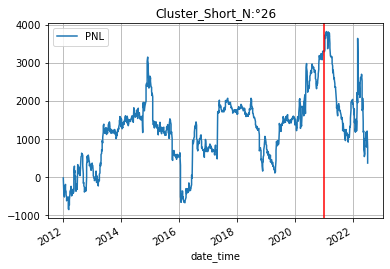

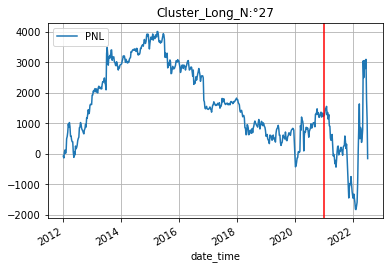

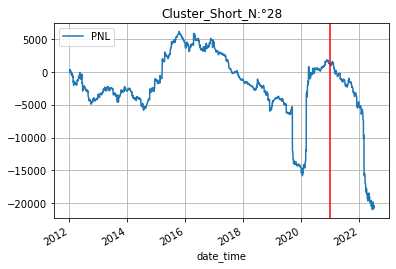

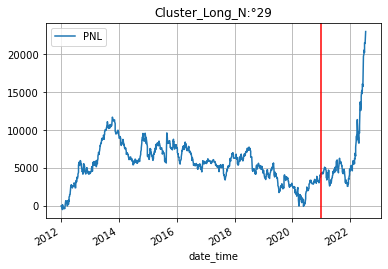

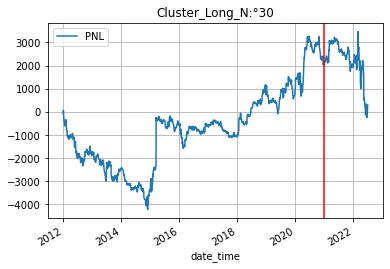

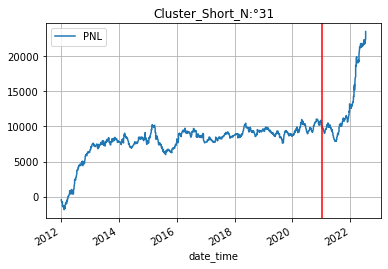

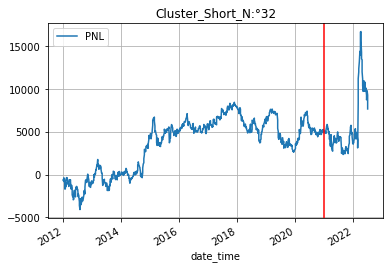

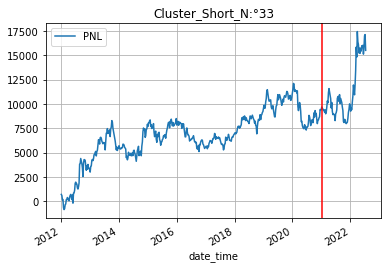

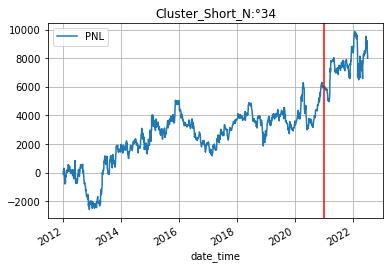

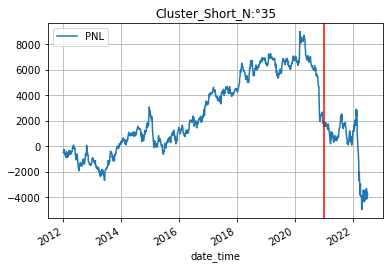

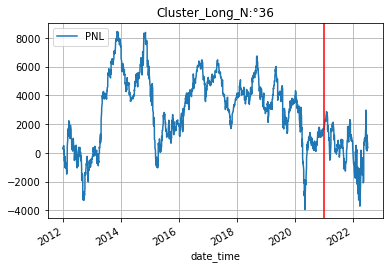

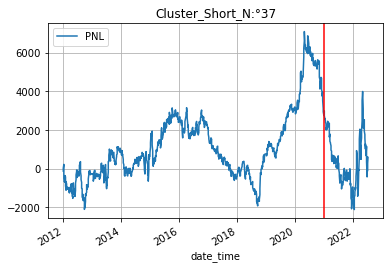

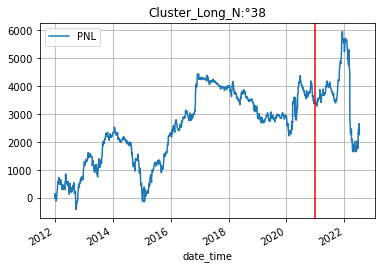

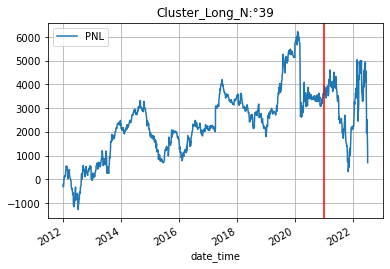

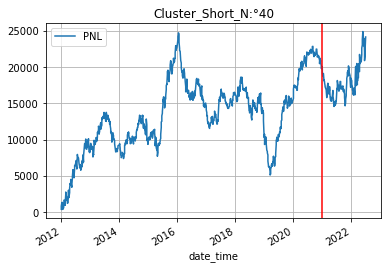

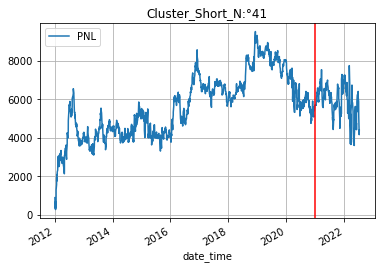

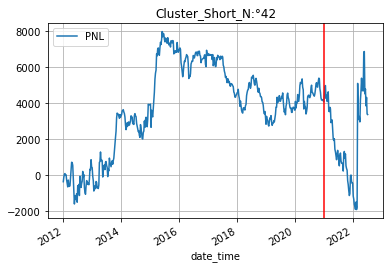

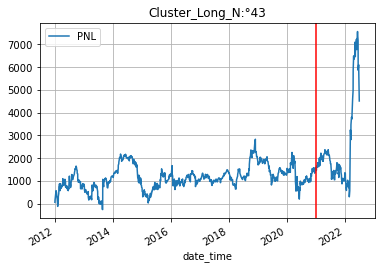

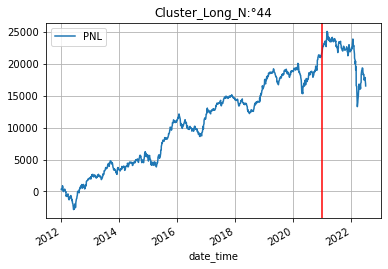

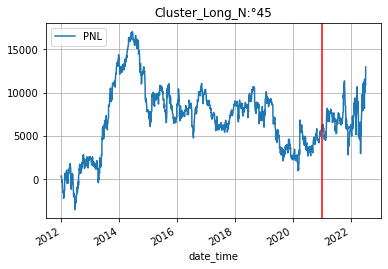

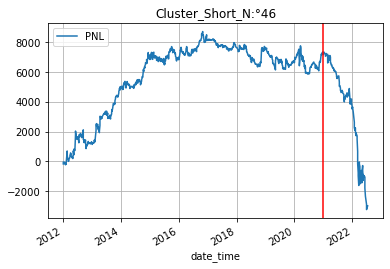

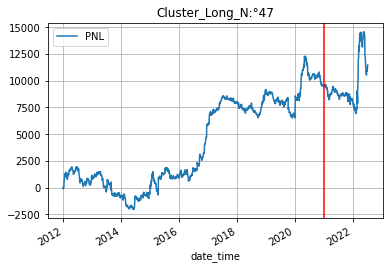

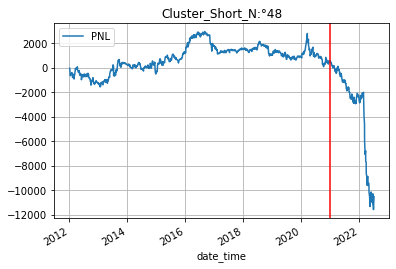

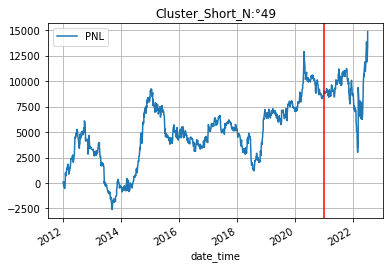

In [10]:
from sklearn.cluster import KMeans

test = pd.DataFrame()
OOS="2021-01-01"
# Supponiamo di avere già creato il dataframe 'X' contenente i dati di addestramento, e 'pnl' contenente i dati completi
X = pnl.iloc[:, 1:].loc[:OOS].copy()

n_clusters = 50

# Creazione e addestramento del modello K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)#,n_init=100)
kmeans.fit(X)


# Ora supponiamo di avere nuovi dati in un dataframe chiamato 'new_data'
# Esegui il clustering su nuovi dati
X = pnl.iloc[:, 1:].copy()
profit_loss_df = pnl.copy()
new_data_cluster_labels = kmeans.predict(X)

# Ora 'new_data_cluster_labels' conterrà le etichette dei cluster assegnate ai nuovi dati.
profit_loss_df['Cluster'] = new_data_cluster_labels
# Visualizzazione dei cluster ottenuti
plt.figure(figsize=(8, 6))
for cluster_id in range(n_clusters):
    cluster_data = profit_loss_df[profit_loss_df['Cluster'] == cluster_id]
    if cluster_data.PNL.loc[:OOS].sum()>0:
        cluster_data.PNL.cumsum().plot(title="Cluster_Long_N:°"+str(cluster_id))
        test = pd.concat([test,cluster_data.PNL.to_frame("Cluster_"+str(cluster_id))])
    else:
        (-cluster_data.PNL).cumsum().plot(title="Cluster_Short_N:°"+str(cluster_id))
        test = pd.concat([test,(-cluster_data.PNL).to_frame("Cluster_"+str(cluster_id))])
    plt.axvline(x=OOS,color="red")
    plt.legend()
    plt.grid(True)
    plt.show()

In [11]:
a=test["Cluster_44"].copy()
a=a[a!=0].dropna()
a=a.to_frame("pnl")
a["H"]=a.index.hour
a["D"]=a.index.dayofweek

<AxesSubplot:xlabel='H'>

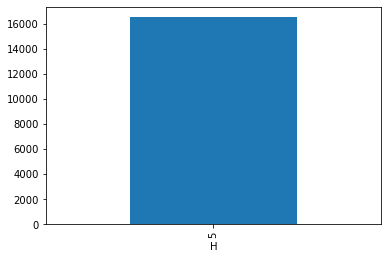

In [12]:
a.groupby("H").sum().pnl.plot.bar()

<AxesSubplot:xlabel='D'>

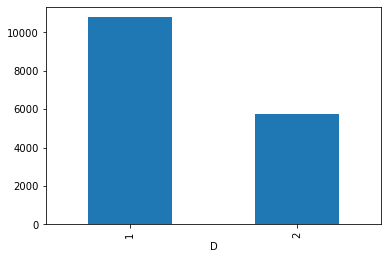

In [13]:
a.groupby("D").sum().pnl.plot.bar()

<AxesSubplot:xlabel='date_time'>

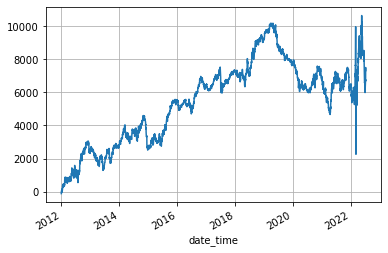

In [251]:
(pnl.PNL)[((pnl.H==20)|(pnl.H==21)|(pnl.H==23)|(pnl.H==23))&((pnl.D==0)|(pnl.D==2)|(pnl.D==3))].cumsum().plot(grid=True)

In [ ]:
a.groupby("H").sum().plot.bar()

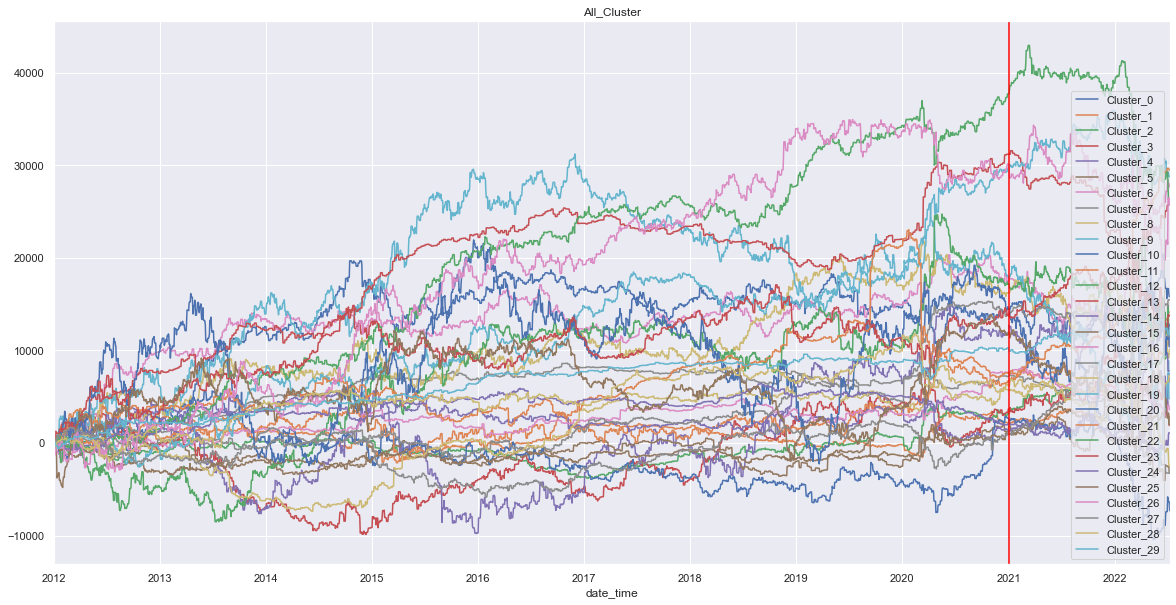

In [41]:
test=test.resample("B").sum()
test.cumsum().plot(title="All_Cluster",figsize=(20,10),grid=True)
#dataset.close.plot(color="grey",linewidth=0.2,secondary_y=True)
plt.axvline(x=OOS,color="red")
plt.show()

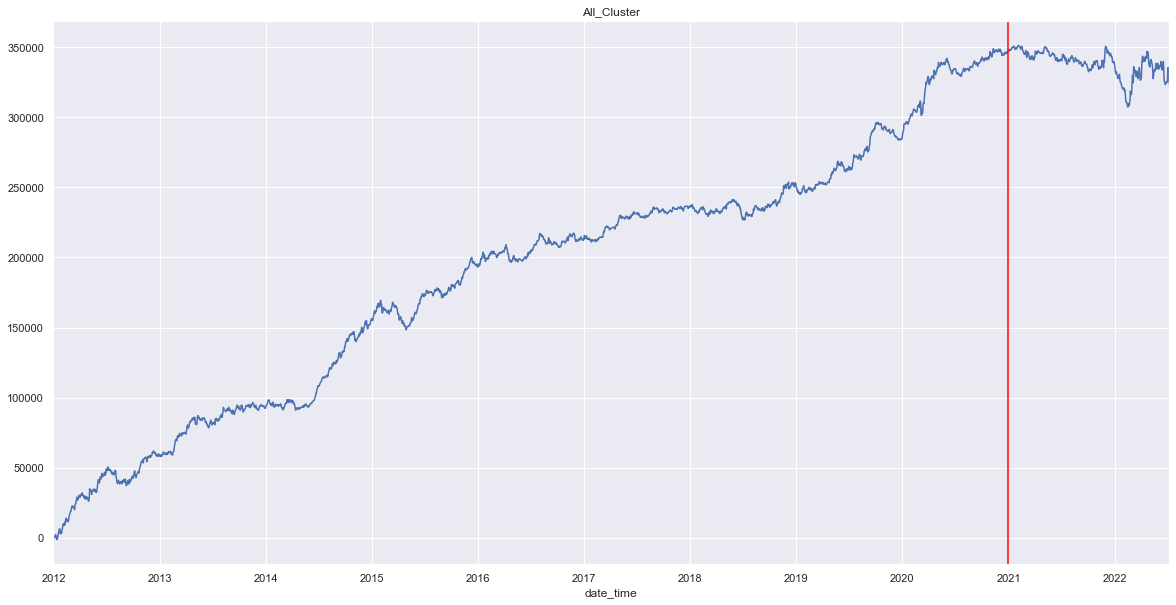

In [42]:
test=test.resample("B").sum()
test.cumsum().sum(axis=1).plot(title="All_Cluster",figsize=(20,10),grid=True)
#dataset.close.plot(color="grey",linewidth=0.2,secondary_y=True)
plt.axvline(x=OOS,color="red")
plt.show()

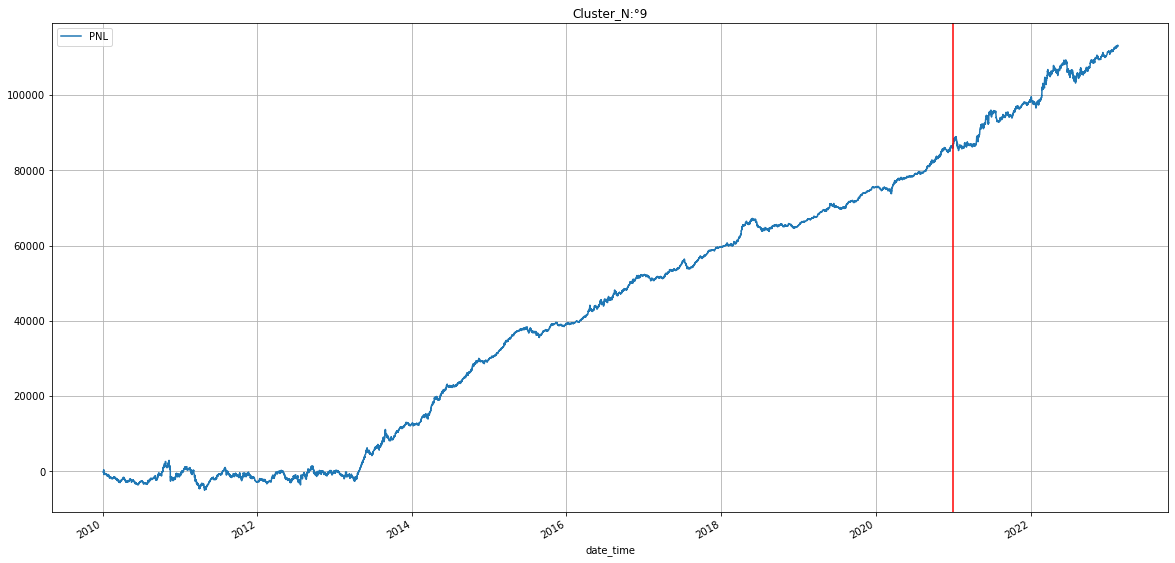

In [13]:
cluster_data = profit_loss_df[(profit_loss_df['Cluster'] == 1)|(profit_loss_df['Cluster'] == 6)]
cluster_data.PNL.cumsum().plot(title="Cluster_N:°"+str(cluster_id),figsize=(20,10))
plt.axvline(x=OOS,color="red")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
data = data*1
data.tail()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p140,p141,p142,p143,p144,p145,p146,p147,p148,p149
date_time,,,,,,,,,,,,,,,,,,,,,
2023-02-17 10:00:00,0,1,1,1,0,0,0,0,1,1,...,0,1,0,0,0,1,1,0,1,0
2023-02-17 11:00:00,0,1,1,1,0,0,0,0,1,1,...,0,1,0,0,0,1,1,0,1,0
2023-02-17 12:00:00,0,1,1,1,0,0,0,0,1,1,...,0,1,0,0,0,1,1,0,1,0
2023-02-17 13:00:00,0,1,1,1,0,0,0,0,1,1,...,0,1,0,0,0,1,1,0,1,0
2023-02-17 14:00:00,0,1,1,1,0,0,0,0,1,1,...,0,1,0,0,0,1,1,0,1,0


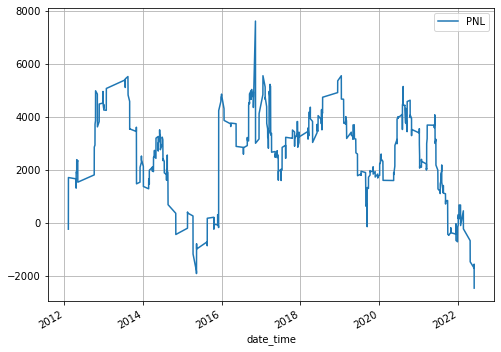

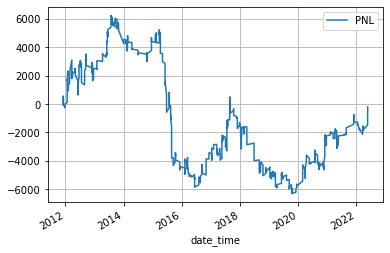

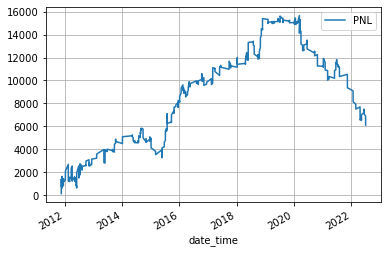

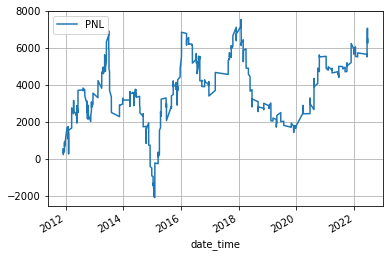

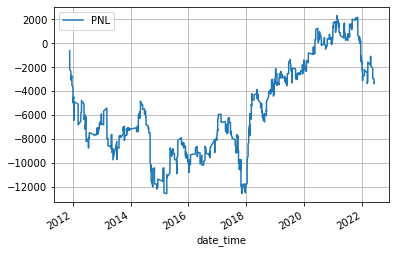

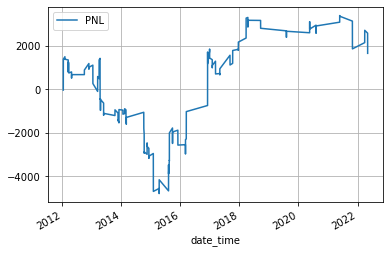

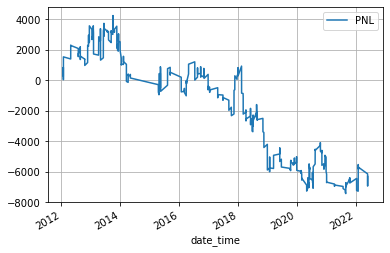

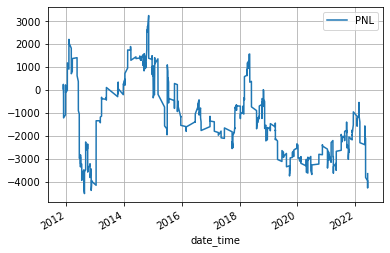

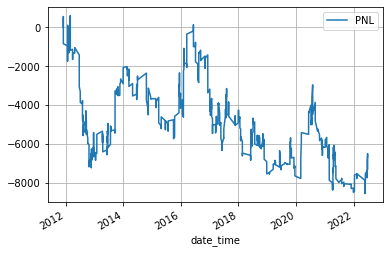

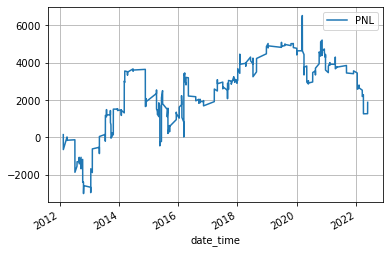

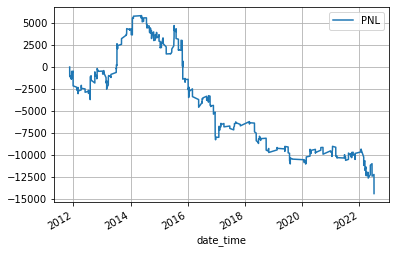

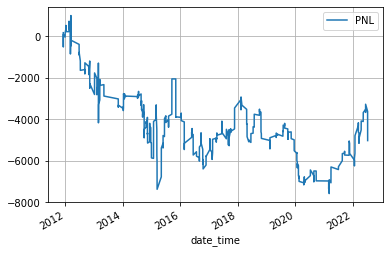

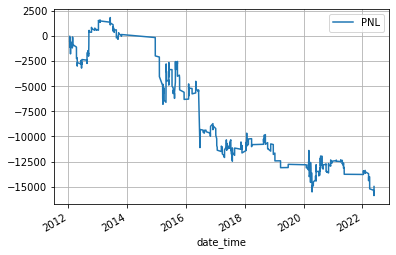

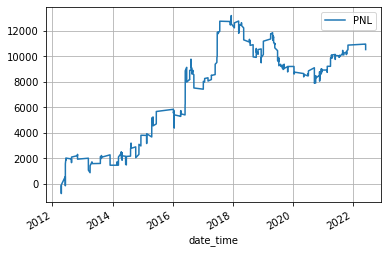

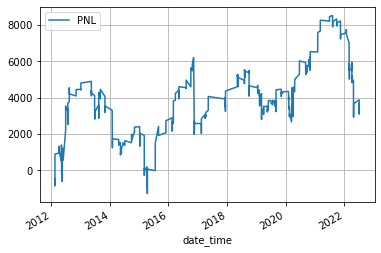

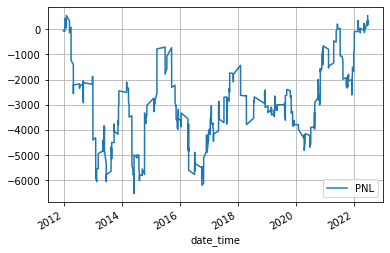

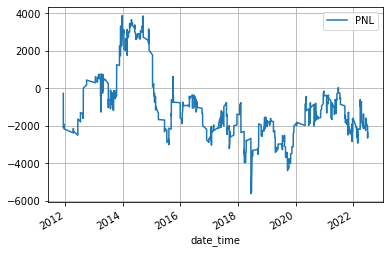

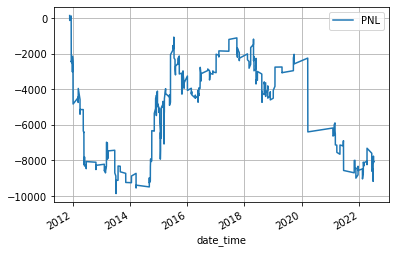

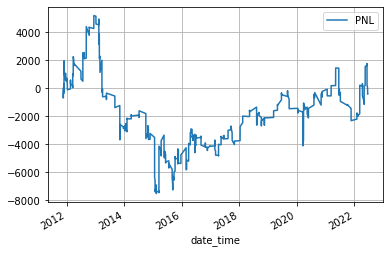

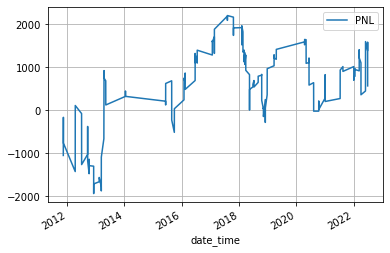

In [28]:
from sklearn.cluster import KMeans

# Supponiamo di avere già creato il dataframe 'X' contenente i dati di addestramento, e 'pnl' contenente i dati completi
X = data.iloc[:,20:50].loc[:"2020-01-01"].copy()
profit_loss_df = pnl.loc[:"2020-01-01"].copy()

n_clusters = 20

# Creazione e addestramento del modello K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Aggiunta delle etichette dei cluster al dataframe originale
profit_loss_df['Cluster'] = kmeans.labels_

# Visualizzazione dei cluster ottenuti
#plt.figure(figsize=(8, 6))
#for cluster_id in range(n_clusters):
#    cluster_data = profit_loss_df[profit_loss_df['Cluster'] == cluster_id]
#    cluster_data.PNL.cumsum().plot()
#    plt.legend()
#    plt.grid(True)
#    plt.show()

# Ora supponiamo di avere nuovi dati in un dataframe chiamato 'new_data'
# Esegui il clustering su nuovi dati
X = data.iloc[:,20:50].copy()
profit_loss_df = pnl.copy()
new_data_cluster_labels = kmeans.predict(X)

# Ora 'new_data_cluster_labels' conterrà le etichette dei cluster assegnate ai nuovi dati.
profit_loss_df['Cluster'] = new_data_cluster_labels

# Visualizzazione dei cluster ottenuti
plt.figure(figsize=(8, 6))
for cluster_id in range(n_clusters):
    cluster_data = profit_loss_df[profit_loss_df['Cluster'] == cluster_id]
    (cluster_data.PNL*(1)).cumsum().plot()
    plt.legend()
    plt.grid(True)
    plt.show()

In [169]:
dataset["session"] = np.where(dataset.index.hour>=20,1,0)
dataset["session"] = np.where(dataset.index.hour<=4,1,dataset["session"])

In [170]:
data = dataset[dataset.session==1]
data.tail(20)

,open,high,low,close,volume,dayofweek,day,week,month,year,...,p141,p142,p143,p144,p145,p146,p147,p148,p149,session
date_time,,,,,,,,,,,,,,,,,,,,,
2023-02-15 03:00:00,1526.25,1528.50,1526.25,1528.50,825.0,2,15,7,2,2023,...,True,False,False,False,True,False,True,False,True,1
2023-02-15 04:00:00,1528.50,1529.50,1527.50,1528.25,585.0,2,15,7,2,2023,...,True,False,False,False,True,False,True,False,True,1
2023-02-15 20:00:00,1525.25,1528.25,1520.50,1528.00,2609.0,2,15,7,2,2023,...,True,False,False,False,True,False,True,False,True,1
2023-02-15 21:00:00,1527.75,1528.50,1526.00,1527.75,684.0,2,15,7,2,2023,...,True,False,False,False,True,False,True,False,True,1
2023-02-15 22:00:00,1527.25,1527.50,1526.25,1526.75,205.0,2,15,7,2,2023,...,True,False,False,False,True,False,True,False,True,1
2023-02-15 23:00:00,1527.00,1527.75,1527.00,1527.25,93.0,2,15,7,2,2023,...,True,False,False,False,True,False,True,False,True,1
2023-02-16 00:00:00,1527.25,1528.00,1525.75,1527.00,189.0,3,16,7,2,2023,...,True,False,False,False,True,False,True,False,True,1
2023-02-16 01:00:00,1527.50,1528.00,1525.50,1526.50,779.0,3,16,7,2,2023,...,True,False,False,False,True,False,True,False,True,1
2023-02-16 02:00:00,1526.50,1526.75,1524.50,1524.50,267.0,3,16,7,2,2023,...,True,False,False,False,True,False,True,False,True,1


In [171]:
dataset = data.copy()

In [14]:
costi = 0 #30

In [13]:
exit_rule_long =["(history.close > history.close)",
                "(history.close < history.close.shift(1)) & (history.close.shift(1) < history.close.shift(2)) & (history.close.shift(2) < history.close.shift(3))",
                "(history.close < history.close.shift(1)) & (history.close.shift(1) < history.close.shift(2))",
                "RSI(history.close,14)<20",
                "(history.high < history.high.shift(1)) & (history.high.shift(1) < history.high.shift(2)) & (history.high.shift(2) < history.high.shift(3))",
                "(history.high < history.high.shift(1)) & (history.high.shift(1) < history.high.shift(2))",
                "(history.low < history.low.shift(1)) & (history.low.shift(1) < history.low.shift(2)) & (history.low.shift(2) < history.low.shift(3))",
                "(history.low < history.low.shift(1)) & (history.low.shift(1) < history.low.shift(2))",
                "RSI(history.close,14)>80",
                "(history.close < history.close.shift(1)) & ((history.high.shift(1) - history.low.shift(1)) > ((history.high.shift(1).rolling(5).max()) - (history.low.shift(1).rolling(5).min())))",
                "history.close < history.low.shift(1).rolling(20).min()"
                ]
exit_rule_short =["(history.close > history.close)",
                "(history.close > history.close.shift(1)) & (history.close.shift(1) > history.close.shift(2)) & (history.close.shift(2) > history.close.shift(3))",
                "(history.close > history.close.shift(1)) & (history.close.shift(1) > history.close.shift(2))",
                "RSI(history.close,14)<20",
                "(history.high > history.high.shift(1)) & (history.high.shift(1) > history.high.shift(2)) & (history.high.shift(2) < history.high.shift(3))",
                "(history.high > history.high.shift(1)) & (history.high.shift(1) > history.high.shift(2))",
                "(history.low > history.low.shift(1)) & (history.low.shift(1) > history.low.shift(2)) & (history.low.shift(2) > history.low.shift(3))",
                "(history.low > history.low.shift(1)) & (history.low.shift(1) > history.low.shift(2))",
                "RSI(history.close,14)>80",
                "(history.close > history.close.shift(1)) & ((history.high.shift(1) - history.low.shift(1)) > ((history.high.shift(1).rolling(5).max()) - (history.low.shift(1).rolling(5).min())))",
                "history.close > history.high.shift(1).rolling(20).max()"
                 ]




In [1]:
def genera_livello(tipo_ordine,direzione,rolling_random_period):
    
    rolling_random_period=str(rolling_random_period)
    
    if (tipo_ordine == "stop") & (direzione == "long") :
        return 'history.high.rolling('+rolling_random_period+').max().shift(1)'
    
    if (tipo_ordine == "stop") & (direzione == "short") :
        return 'history.low.rolling('+rolling_random_period+').min().shift(1)'
    
    if (tipo_ordine == "limit") & (direzione == "short") :
        return 'history.high.rolling('+rolling_random_period+').max().shift(1)'
    
    if (tipo_ordine == "limit") & (direzione == "long") :
        return 'history.low.rolling('+rolling_random_period+').min().shift(1)'
    
    if tipo_ordine == "market" :
        return 'history.close.shift(1)'
    
ls_level = []
direzione = "short"

for e in ["stop","limit"]:
    for i in range(2,21):
        ls_level.append(genera_livello(e,direzione,i))

In [2]:
len(ls_level)


38

<AxesSubplot:xlabel='date_time'>

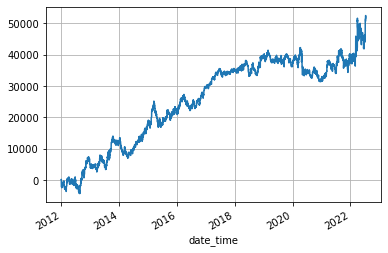

In [16]:
j=(-pnl.PNL)[((pnl.H==8)|(pnl.H==9)|(pnl.H==10))&((pnl.D==0)|(pnl.D==1)|(pnl.D==2))]
j.cumsum().plot(grid=True)
            

In [17]:
res = pd.DataFrame()
history = dataset.copy()

from datetime import datetime

costi = 0

info = []

#for e in range(100):
cnt=0
for i in tqdm(ls_level):
    for e in exit_rule_long:
        for h in ["stop","limit"]:   
    
            entry_rule = "(pnl.H==7)&((pnl.D==2)|(pnl.D==3)|(pnl.D==4))"

            tipo_ordine = h #random.choice(["stop","limit"])

            direzione = "short"

            ADD_RULE_CONDITION = "False"#"(dataset.index.hour>=14) & (dataset.index.hour<=13)"

            exit_rule = "(pnl.H>10)|"+e #exit_rule_short[random.randint(0, len(exit_rule_short)-1)]
            
            exit_rule_bk = exit_rule
            
            TP = 0

            SL = 0 

            exit_bars = 0

            #rolling_random_period = random.randint(2, 20)

            level = i #genera_livello(tipo_ordine,direzione,rolling_random_period)

            
            ############################################ X GENETICO

            #today = datetime.today().strftime('%Y-%m-%d')

            entry = np.array(np.array(eval(entry_rule)) & np.array(level_to_condition(level,history,tipo_ordine,direzione)) & check_add_rule(ADD_RULE_CONDITION,history))

            if SL == 0:
                loss = np.array([False]*len(entry))
            else:
                loss = np.array(check_stoploss(SL,history,eval(level),bigpointvalue,direzione))

            if TP == 0:
                gain = np.array([False]*len(entry))
            else:
                gain = np.array(check_takeprofit(TP,history,eval(level),bigpointvalue,direzione))

            if exit_rule == "False":
                np.array([False]*len(entry))
            else:
                exit_rule = np.array(eval(exit_rule))

            price = np.array(history.open)
            index_date = np.array(history.index)

            start = time.time()

            big_ls=[]
            while True:
                if exit_bars == 0:
                    exit_bars = 999999999
                ingresso = np.where(entry==True)[0]  
                if ingresso.size >1:
                    ingresso=ingresso[0]+1
                    uscita_a_barre = ingresso+exit_bars

                    uscita_a_loss = np.where(loss==True)[0] 
                    uscita_a_loss = uscita_a_loss[uscita_a_loss>=ingresso]
                    if uscita_a_loss.size == 0:
                        uscita_a_loss = 999999999
                    else:
                        uscita_a_loss = uscita_a_loss[0]+1

                    uscita_a_gain = np.where(gain==True)[0]
                    uscita_a_gain = uscita_a_gain[uscita_a_gain>=ingresso]
                    if uscita_a_gain.size == 0:
                        uscita_a_gain = 999999999
                    else:
                        uscita_a_gain = uscita_a_gain[0]+1

                    uscita_a_rule = np.where(exit_rule==True)[0]
                    uscita_a_rule = uscita_a_rule[uscita_a_rule>=ingresso]
                    if uscita_a_rule.size == 0:
                        uscita_a_rule = 999999999
                    else:
                        uscita_a_rule = uscita_a_rule[0]+1    

                    first_exit = np.sort([uscita_a_barre,uscita_a_loss,uscita_a_gain,uscita_a_rule])[0]

                    if price.size <= first_exit:  ####
                        first_exit = price.size-1   ####

                    operation = ((price[first_exit]-price[ingresso])*bigpointvalue)
                    if direzione == "short":
                        operation=operation*(-1)
                        operation=operation-costi
                    else:
                        operation=operation-costi
                    index_start = index_date[ingresso]
                    index_exit = index_date[first_exit]
                    big_ls.append([index_start,index_exit,price[ingresso],price[first_exit],np.round_(operation, decimals=2)])

                    entry = entry[first_exit:]
                    loss = loss[first_exit:]
                    gain = gain[first_exit:]
                    exit_rule = exit_rule[first_exit:]
                    price = price[first_exit:]
                    index_date = index_date[first_exit:]
                else:
                    break


            #end = time.time()
            #print("Backtest strategia ..." , end - start)


            op=pd.DataFrame(big_ls)
            if len(op)>0:
                op.columns=(["entry_time","exit_time","prezzo_ingresso","prezzo_uscita","operations"])
                op["direzione"]=direzione
                op.set_index(["exit_time"],inplace=True)
                op.index=pd.to_datetime(op.index)

                #op.operations.cumsum().plot()
                #plt.show()

                res = pd.concat([res,op.operations.to_frame("tl_"+str(cnt))],axis=1).fillna(0)
                info.append([entry_rule,tipo_ordine,direzione,ADD_RULE_CONDITION,exit_rule_bk,level,"tl_"+str(cnt)])
                cnt=cnt+1

  0%|          | 0/38 [00:00<?, ?it/s]

<AxesSubplot:xlabel='date_time'>

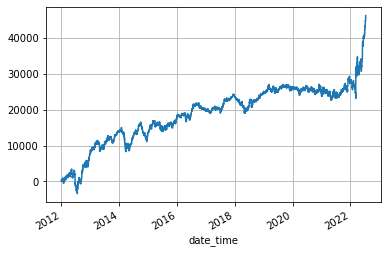

In [199]:
#op.operations.cumsum().plot()
j=(-pnl.PNL)[((pnl.H==8)|(pnl.H==9)|(pnl.H==10)|(pnl.H==11))&((pnl.D==0)|(pnl.D==1)|(pnl.D==2))]
j.cumsum().plot(grid=True)

In [119]:
op["idx"]=op.index
op.set_index(["entry_time"],inplace=True)
op["H"]=op.index.hour
op["D"]=op.index.dayofweek

In [ ]:
j=j.resample("B").sum()

In [125]:
op=op.resample("B").sum()
op["S2"]=j[j!=0]

<AxesSubplot:xlabel='entry_time'>

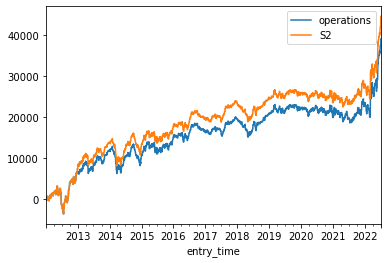

In [127]:
op=op.fillna(0)
op[["operations","S2"]].cumsum().plot()


In [18]:
results = pd.DataFrame()

for e in tqdm(res.columns):
    
    x = res[e]
    x = x[x!=0]
    
    y = performance_report_gen(x)
    y["Pattern"] = e

    results = pd.concat([results,y])
results=results.sort_values("AverageTrade",ascending=False)

  0%|          | 0/836 [00:00<?, ?it/s]

In [258]:
results

,Profit,MaxDD,Operations,AverageTrade,ProfitFactor,PctWin,KestnerRatio,STD_Daily,Skew,Reward_Risk_Ratio,Pattern
0,2550.0,-750.0,57,44.74,2.26,61.40,0.07,21.967341,1.470493,1.42,tl_551
0,2550.0,-750.0,57,44.74,2.26,61.40,0.07,21.967341,1.470493,1.42,tl_569
0,2112.5,-750.0,49,43.11,2.17,61.22,0.05,21.191030,1.523303,1.38,tl_683
0,2112.5,-750.0,49,43.11,2.17,61.22,0.05,21.191030,1.523303,1.38,tl_701
0,1987.5,-750.0,52,38.22,1.99,59.62,0.04,21.384827,1.562861,1.35,tl_613
0,1987.5,-750.0,52,38.22,1.99,59.62,0.04,21.384827,1.562861,1.35,tl_591
0,1987.5,-750.0,52,38.22,1.99,59.62,0.04,21.384827,1.562861,1.35,tl_573
0,1987.5,-750.0,52,38.22,1.99,59.62,0.04,21.384827,1.562861,1.35,tl_635
0,1987.5,-750.0,52,38.22,1.99,59.62,0.04,21.384827,1.562861,1.35,tl_595
0,1987.5,-750.0,52,38.22,1.99,59.62,0.04,21.384827,1.562861,1.35,tl_617


In [20]:
selezione = results[(results.AverageTrade>100)&(results.Operations>100)]#&(results.PctWin>50)]
selezione

,Profit,MaxDD,Operations,AverageTrade,ProfitFactor,PctWin,KestnerRatio,STD_Daily,Skew,Reward_Risk_Ratio,Pattern
0,37330.0,-4990.0,317,117.76,1.53,53.94,0.30,217.941471,0.574108,1.30,tl_198
0,37330.0,-4990.0,317,117.76,1.53,53.94,0.30,217.941471,0.574108,1.30,tl_216
0,36950.0,-4990.0,324,114.04,1.51,53.70,0.29,219.000180,0.577952,1.30,tl_176
0,36950.0,-4990.0,324,114.04,1.51,53.70,0.29,219.000180,0.577952,1.30,tl_194
0,33920.0,-4990.0,305,111.21,1.49,53.44,0.25,216.009859,0.592716,1.30,tl_220
0,33920.0,-4990.0,305,111.21,1.49,53.44,0.25,216.009859,0.592716,1.30,tl_238
0,30570.0,-4990.0,275,111.16,1.47,52.73,0.20,210.299336,0.624513,1.32,tl_282
0,30570.0,-4990.0,275,111.16,1.47,52.73,0.20,210.299336,0.624513,1.32,tl_264
0,36650.0,-4990.0,337,108.75,1.49,53.41,0.28,220.996138,0.585466,1.30,tl_154
0,36650.0,-4990.0,337,108.75,1.49,53.41,0.28,220.996138,0.585466,1.30,tl_172


In [3]:
res[selezione.Pattern].cumsum().plot(legend=None)

NameError: name 'res' is not defined

<AxesSubplot:xlabel='exit_time'>

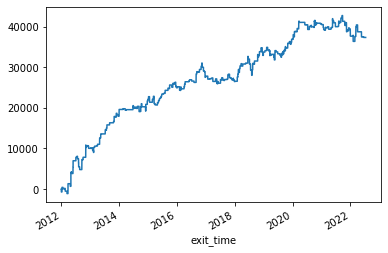

In [22]:
res["tl_198"].cumsum().plot()

In [35]:
import pandas as pd
from tqdm.notebook import tqdm
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.express as px

def kestner_ratio_mod(operations):
    
    """Funzione modificata senza resample dei dati"""

    import numpy as np
    import matplotlib.pyplot as plt 
    from scipy import stats
    
    equity = operations.cumsum()
    index = np.array(np.arange(1,equity.count() + 1))
    
    x = index
    y = equity
    gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    
    if std_err != 0 and len(index) > 0:
        return round(gradient / (std_err * len(index)),5)
    else:
        return np.inf

def Agg_Prt_Kestner_Ratio(n_strategy,stampa,dataframe_insample,dataframe_equity):
    
    from itertools import groupby
    from IPython.display import clear_output
    
    newdf=dataframe_insample    
    best_ks=[]
    for g in tqdm(range(len(newdf.columns))):
        x=newdf.iloc[:,g].loc[:OOS]
        y=kestner_ratio_mod(x)
        best_ks.append(y)
    best_strategy=best_ks.index(max(best_ks))
    ls_ok=[]
    ls_ok=[newdf.iloc[:,best_strategy].name]
    ls_col=newdf.columns.to_list()
    ls_col.remove(newdf.iloc[:,best_strategy].name)
    id_ok=[]
    big_ls=[]
    stampa=stampa
    max_strategy=n_strategy
    while True:
        x=newdf[ls_ok].sum(axis=1)
        ls=[]
        if stampa ==1:
            clear_output(wait=True)
            x.cumsum().plot(figsize=(20,10),title="Run N°:"+str(len(ls_ok)))
            plt.show()
        for f in ls_col:
            y=newdf[f]
            k=pd.concat([x,y],axis=1)
            k=k.sum(axis=1)
            #k=k.where(k!=0).dropna()
            j=kestner_ratio_mod(k)
            if j != np.nan:
                ls.append(j)
        ok=ls.index(max(ls))
        ls_ok.append(ls_col[ok])
        big_ls.append(list(set(ls_ok)))
        id_ok.append(max(ls))
        ls_col.remove(ls_col[ok]) ##### modifica 2023
        if len(ls_ok)> max_strategy-1:
            test=pd.DataFrame(ls_ok)
            test.columns=(["val"])
            test["cnt"]=1
            df_mm=test.groupby(by=["val"]).sum()
            df_mm.plot.bar(figsize=(10,10))
            plt.show()
            dataframe_equity[ls_ok].cumsum().plot(figsize=(20,10))
            plt.show()
            dataframe_equity[ls_ok].sum(axis=1).cumsum().plot(figsize=(20,10))
            plt.axvline(OOS, color="red", linestyle="--",label="OutOfSample")
            plt.show()
            break
    return df_mm


def Agg_Prt_MinVar_DD(n_strategy,stampa,dataframe_drawdown,dataframe_equity):

    from itertools import groupby
    from IPython.display import clear_output
    np_sys=dataframe_drawdown.T.values    
    min_var=[]
    for g in tqdm(range(len(np_sys))):
        x=np_sys[g]
        y=x.var()
        min_var.append(y)
    best_strategy=min_var.index(min(min_var))
    ls_ok=[]
    ls_ok=[best_strategy]
    ls_col=newdf.columns.to_list()
    id_ok=[]
    big_ls=[]
    stampa=stampa
    min_strategy=n_strategy
    while True:
        x=sum(np_sys[ls_ok])        
        ls=[]
        if stampa ==1:
            clear_output(wait=True)
            dataframe_drawdown.iloc[:,ls_ok].sum(axis=1).plot(figsize=(20,10),title="Run N°:"+str(len(ls_ok)+1))
            plt.show()
        for f in range(len(np_sys)):
            y=np_sys[f]
            k=x+y
            j=k.var()
            if (j != np.nan)|(j != np.inf):
                ls.append(round((j),5))
        ls_clean=[]
        for e in ls:
            if e == np.inf:
                ls_clean.append(0)
            else:
                ls_clean.append(e)
        min_v=min(ls_clean)
        ok=ls.index(min_v)
        ls_ok.append(ok)    
        big_ls.append(list(set(ls_ok)))
        id_ok.append(min_v)
        if (len(ls_ok)>=min_strategy):
            test=pd.DataFrame(ls_ok)
            test.columns=(["val"])
            test["cnt"]=1
            df_mm=test.groupby(by=["val"]).sum()
            relative_name=list(set(dataframe_equity.iloc[:,ls_ok].columns.to_list()))
            df_mm.index=relative_name
            df_mm.plot.bar(figsize=(10,10))
            plt.show()
            dataframe_equity.iloc[:,ls_ok].cumsum().plot(figsize=(20,10))
            plt.show()
            dataframe_equity.iloc[:,ls_ok].sum(axis=1).cumsum().plot(figsize=(20,10))
            plt.axvline(OOS, color="red", linestyle="--",label="OutOfSample")
            plt.show()
            drawdown(dataframe_equity.iloc[:,ls_ok].sum(axis=1).cumsum()).plot(figsize=(20,5))
            break
    return df_mm

In [31]:
df2=test.copy()
df3 = df2.std().to_frame("STD")
df3["STD_MAX"] = df3.STD.max()
df3["SIZE"] = (df3["STD_MAX"]/df3["STD"]).round(2)
display(df3)
df4=df2.copy()
for i in df3.index.to_list():
    df4[i] = df4[i]*df3.SIZE[df3.index==i].values[0]
df4.tail()

,STD,STD_MAX,SIZE
Cluster_0,329.087947,486.099888,1.48
Cluster_1,139.858913,486.099888,3.48
Cluster_2,201.980772,486.099888,2.41
Cluster_3,255.659376,486.099888,1.90
Cluster_4,440.799400,486.099888,1.10
Cluster_5,213.710446,486.099888,2.27
Cluster_6,257.127111,486.099888,1.89
Cluster_7,178.203525,486.099888,2.73
Cluster_8,251.296378,486.099888,1.93
Cluster_9,459.735508,486.099888,1.06


,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,...,Cluster_20,Cluster_21,Cluster_22,Cluster_23,Cluster_24,Cluster_25,Cluster_26,Cluster_27,Cluster_28,Cluster_29
date_time,,,,,,,,,,,,,,,,,,,,,
2022-06-27 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,358.0
2022-07-04 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-501.2
2022-07-04 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1897.4
2022-07-11 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,393.8
2022-07-11 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2148.0


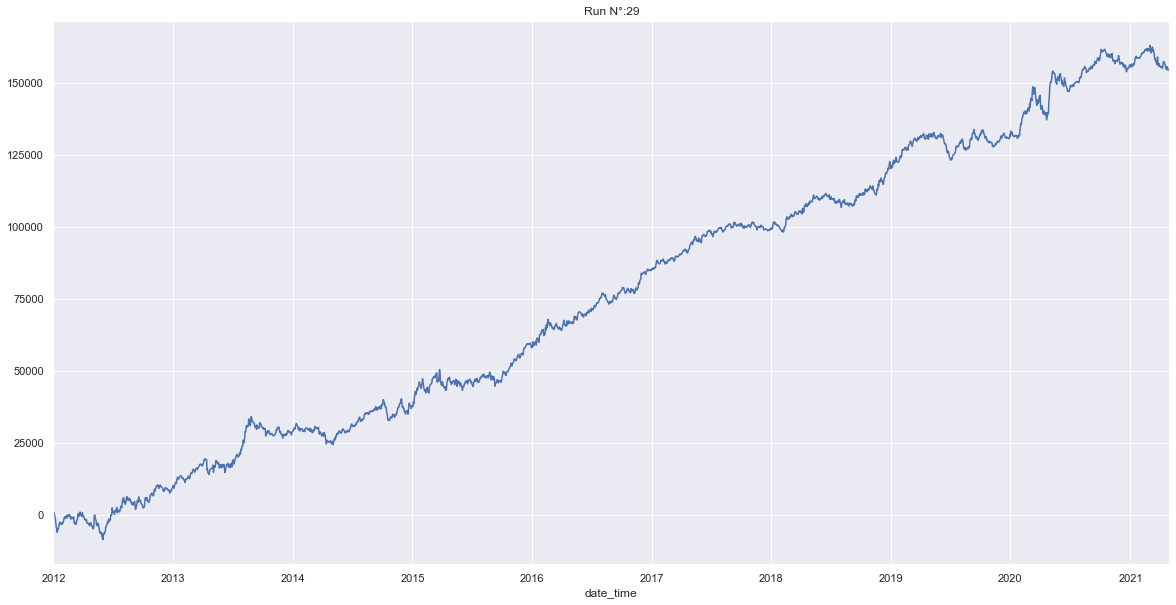

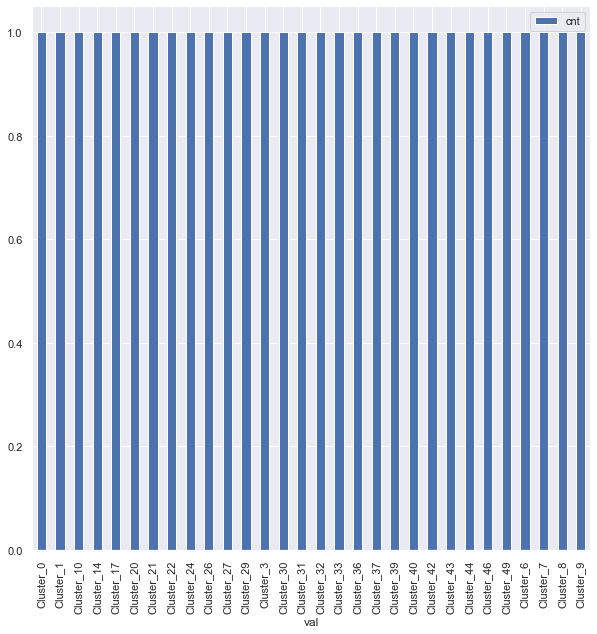

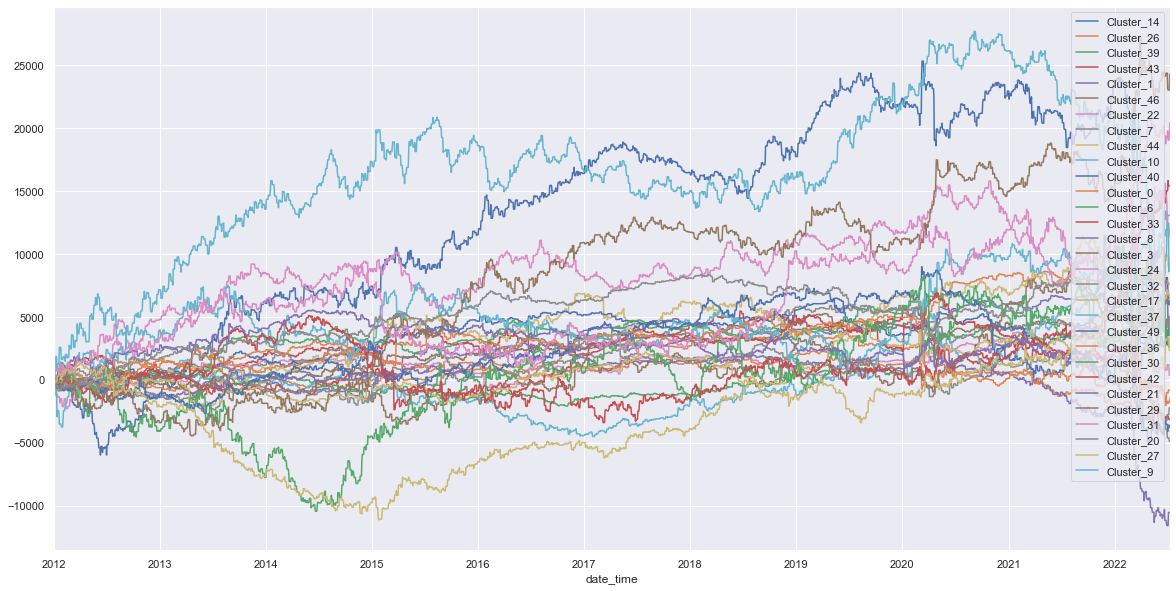

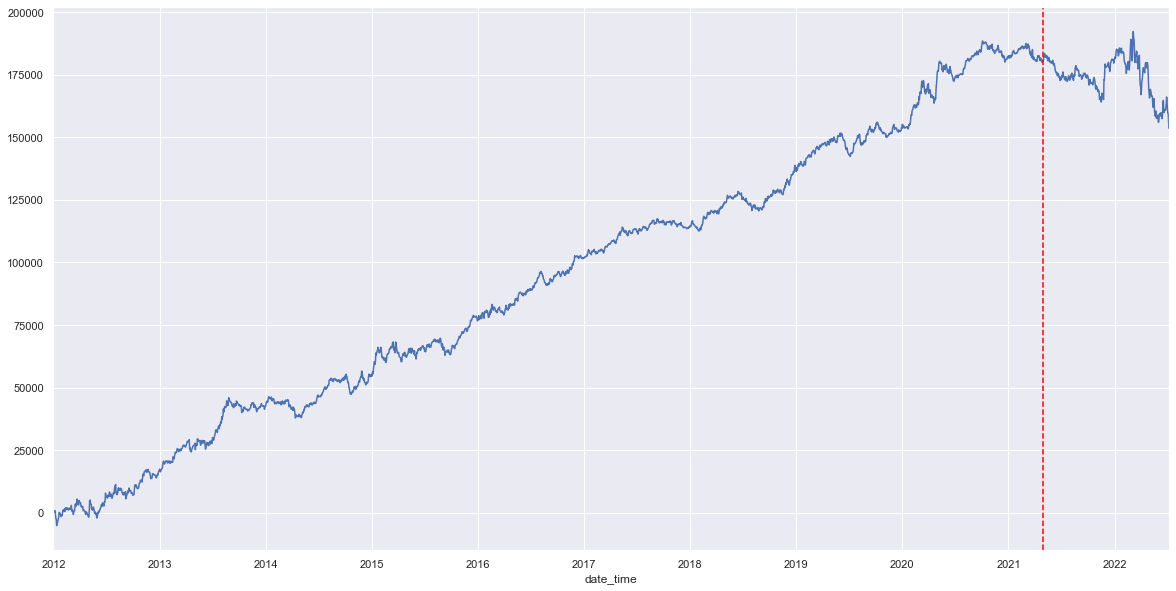

In [50]:
OOS="2021-05-01"
test=test.resample("B").sum()
df2=test.fillna(0).copy()
#df4.index=pd.to_datetime(df4.index)
#df4=df4.fillna(0)
portafolio_kestner=Agg_Prt_Kestner_Ratio(30,1,df2.loc[:OOS],df2)

In [39]:
df2.loc[:OOS].head()

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,...,Cluster_20,Cluster_21,Cluster_22,Cluster_23,Cluster_24,Cluster_25,Cluster_26,Cluster_27,Cluster_28,Cluster_29
date_time,,,,,,,,,,,,,,,,,,,,,
2012-01-05 13:00:00,350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-05 14:00:00,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-06 13:00:00,-140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-06 14:00:00,210.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-12 13:00:00,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
